### Code Implementation

In [13]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pickle

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_train_imgs = gray_data['x_train']
gray_test_imgs = gray_data['x_test']
gray_train_labels = gray_data['y_train']
gray_test_labels = gray_data['y_test']
gray_valid_imgs = gray_data['x_validation']
gray_valid_labels = gray_data['y_validation']

In [3]:
gray_train_labels[gray_train_labels <= 10] = 0 #cycle
gray_train_labels[gray_train_labels >= 32] = 0 #cycle
gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 2 #triangle
gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 2 #triangle
gray_train_labels[gray_train_labels == 14] = 1 # 6
gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 2 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 2 #triangle
gray_test_labels[gray_test_labels == 14] = 1 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4


gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 2 #triangle
gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 2 #triangle
gray_valid_labels[gray_valid_labels == 14] = 1 # 6
gray_valid_labels[gray_valid_labels == 12] = 3 # 4

In [12]:
gray_test_labels.shape

(12630,)

In [4]:
y_test = gray_test_labels[(gray_test_labels == 0 )|(gray_test_labels == 1) ] 
y_train = gray_train_labels[(gray_train_labels == 0 )|(gray_train_labels == 1) ]
y_valid = gray_valid_labels[(gray_valid_labels == 0 )|(gray_valid_labels == 1) ]

### Image Data Preprocessing

In [5]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = gray_train_imgs[(gray_train_labels == 0 )|(gray_train_labels == 1)]
x_test = gray_test_imgs[(gray_test_labels == 0 )|(gray_test_labels == 1)] 
x_valid = gray_valid_imgs[(gray_valid_labels == 0 )|(gray_valid_labels == 1)] 
# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 2

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_class_shape)
y_test = keras.utils.to_categorical(y_test, num_class_shape)
y_valid = keras.utils.to_categorical(y_valid, num_class_shape)

In [61]:
a, x_train, b, y_train = train_test_split(x_train, y_train, test_size=0.36, random_state=42)

### LeNet Model Architecture

In [19]:
keras.backend.clear_session()

In [20]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(2, activation='softmax'))

In [21]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1 , validation_data =(x_valid , y_valid))

Epoch 1/20
411/411 [==============================] - 5s 10ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/20
411/411 [==============================] - 4s 9ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9976
Epoch 3/20
411/411 [==============================] - 4s 9ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0064 - val_accuracy: 0.9979
Epoch 4/20
411/411 [==============================] - 4s 9ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9986
Epoch 5/20
411/411 [==============================] - 4s 9ms/step - loss: 9.6672e-04 - accuracy: 0.9997 - val_loss: 6.6923e-04 - val_accuracy: 0.9997
Epoch 6/20
411/411 [==============================] - 4s 9ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 1.8409e-04 - val_accuracy: 1.0000
Epoch 7/20
411/411 [==============================] - 4s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.6213e-04 - val_accura

####  36% data


In [65]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

264/264 [==============================] - 2s 5ms/step - loss: 0.0108 - accuracy: 0.9986
Test Loss: 0.010801092721521854
Test accuracy: 0.9985765218734741


In [66]:
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True)
print(cr)

264/264 [==============================] - 1s 3ms/step
{'0': {'precision': 0.9985315712187959, 'recall': 1.0, 'f1-score': 0.9992652461425422, 'support': 8160}, '1': {'precision': 1.0, 'recall': 0.9555555555555556, 'f1-score': 0.9772727272727273, 'support': 270}, 'accuracy': 0.998576512455516, 'macro avg': {'precision': 0.9992657856093979, 'recall': 0.9777777777777779, 'f1-score': 0.9882689867076347, 'support': 8430}, 'weighted avg': {'precision': 0.9985786027455961, 'recall': 0.998576512455516, 'f1-score': 0.9985608594171743, 'support': 8430}}


#### all data

In [23]:

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

264/264 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.9993
Test Loss: 0.005598774645477533
Test accuracy: 0.9992882609367371


In [10]:
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True)
print(cr)

264/264 [==============================] - 1s 3ms/step
{'0': {'precision': 0.9993874800931031, 'recall': 0.9997549019607843, 'f1-score': 0.9995711572627581, 'support': 8160}, '1': {'precision': 0.9925093632958801, 'recall': 0.9814814814814815, 'f1-score': 0.9869646182495345, 'support': 270}, 'accuracy': 0.9991696322657176, 'macro avg': {'precision': 0.9959484216944916, 'recall': 0.990618191721133, 'f1-score': 0.9932678877561463, 'support': 8430}, 'weighted avg': {'precision': 0.9991671845373202, 'recall': 0.9991696322657176, 'f1-score': 0.9991673891093097, 'support': 8430}}


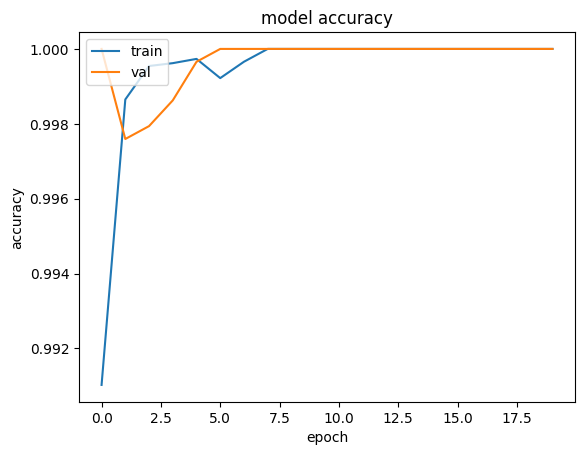

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

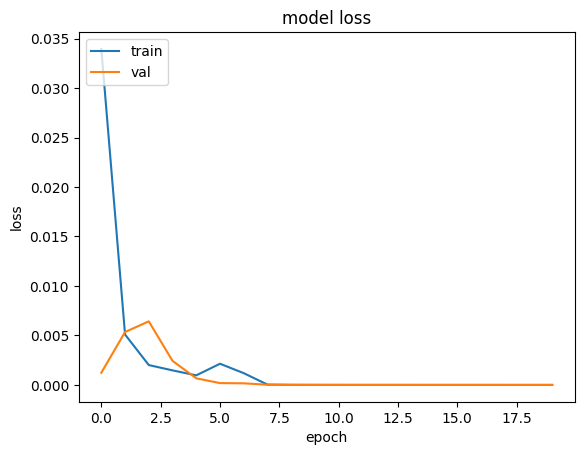

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
y_test.argmax(axis = -1)[5]

1

In [67]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape clssifier\\shape_classifier_circleVS6di_acc9994.h5"  

model.save(model_save_dir)

## Hope you like it!

In [ ]:
from matplotlib import pyplot as plt
image = gray_test_imgs[5]#.transpose(2 , 0 ,1)
# plt.imshow(image, cmap=plt.get_cmap('gray'))
# plt.show()
y = model.predict(image)
print(y)